In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg' # For mac users with Retina display

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import healpy as hp

import sys
sys.path.append('src/')
from pSZ import pSZ

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create pSZ class


In [10]:
theory = pSZ()


In [11]:
theory.load_smica()


NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


array([2.08161652e-06, 2.08239404e-06, 2.08614750e-06, ...,
       3.11158000e-06, 3.11252541e-06, 3.11593680e-06])

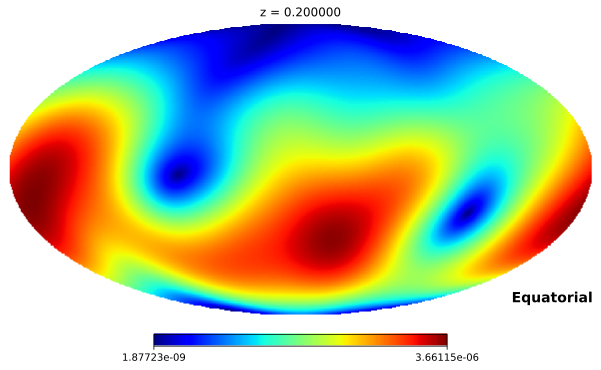

In [16]:
theory.remote_quadrupole(0.2, lmax=5, nside=512, cmap='jet', coord=['G','C'], plot=True, return_QU=False)

## Read in SPT-3G mask

In [39]:
mask_3g = hp.read_map('/Users/fbianchini/Downloads/3g_mask.fits')

/Users/fbianchini/anaconda2/envs/py3/lib/python3.6/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [27]:
# mask_3g_original = hp.ud_grade(mask_3g, nside_out=512)
mask_3g[mask_3g>0] = 1
mask_3g[mask_3g==0] = 0.8


In [40]:
mask_3g = hp.ud_grade(mask_3g, nside_out=512)
r = hp.Rotator(coord=['C','G']) 
mask_3g_gal = r.rotate_map_alms(mask_3g)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [34]:
mask_3g_gal[mask_3g_gal>=0.8] = 1
mask_3g_gal[mask_3g_gal<0.8] = 0

In [84]:
mask_3g_gal_binary = np.zeros_like(mask_3g_gal)
mask_3g_gal_binary[mask_3g_gal>0.5] = 1

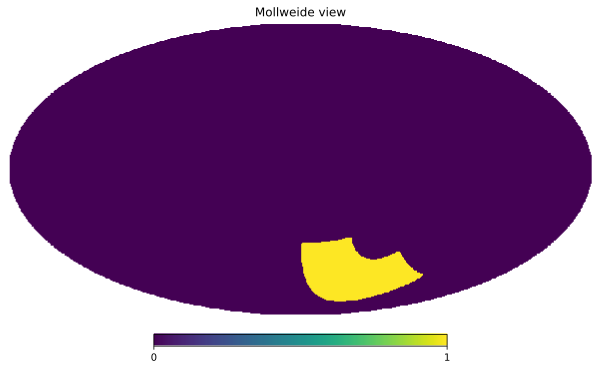

In [86]:
hp.mollview(mask_3g_gal_binary)

In [42]:
mask_3g

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:
Pc_z0p05 = theory.remote_quadrupole(0.05, return_QU=1, plot=0)

src/pSZ.py:133: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


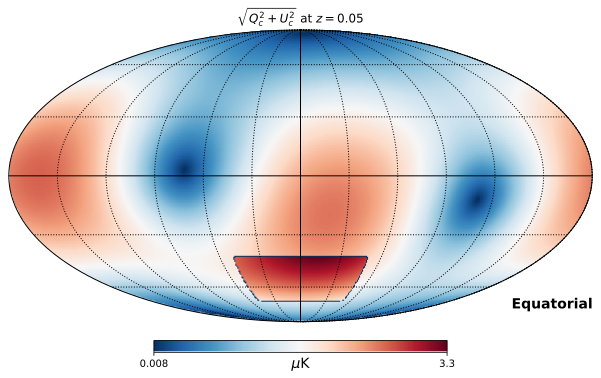

In [103]:
hp.mollview(Pc_z0p05[0]*1e6*mask_3g_gal_trans, cmap='RdBu_r',coord=['G','C'], min=0.008, max=3.3, title=r'$\sqrt{Q_c^2+U_c^2}$ at $z=0.05$', unit=r'$\mu$K')
hp.graticule()
plt.savefig('plots/pc_z0p05.pdf')

In [88]:
zs = np.linspace(0.05,2,15)

Pc_mean_full = np.zeros_like(zs)
Pc_mean_3g   = np.zeros_like(zs)
for iz, _z_ in enumerate(zs):
    print(iz,_z_)
    Pc_tmp = theory.remote_quadrupole(_z_, lmax=5, nside=512, plot=False)
    Pc_mean_full[iz] = Pc_tmp.mean()*1e6
    Pc_mean_3g[iz]   = (Pc_tmp[np.where(mask_3g_gal_binary==1)]).mean()*1e6

0 0.05


src/pSZ.py:133: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
1 0.18928571428571428
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
2 0.32857142857142857
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
3 0.46785714285714286
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
4 0.6071428571428572
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
5 0.7464285714285714
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
6 0.8857142857142858
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
7 1.0250000000000001
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
8 1.1642857142857144
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
9 1.3035714285714286
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
10 1.4428571428571428
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
11 1.5821428571428573
Sigma is 0.00000

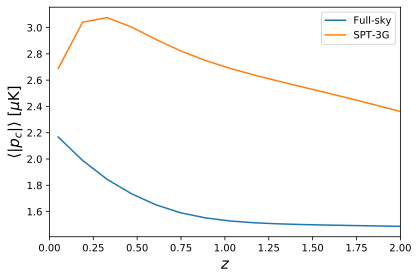

In [90]:
plt.plot(zs, Pc_mean_full, label='Full-sky')
plt.plot(zs, Pc_mean_3g, label='SPT-3G')
plt.xlabel(r'$z$', size=15)
plt.ylabel(r'$\langle|p_c|\rangle$ [$\mu$K]', size=15)
plt.legend(loc='best')
plt.xlim(0,2)
plt.tight_layout()
plt.savefig('plots/mean_pc_z.pdf')

In [91]:
Pc_z0p345 = theory.remote_quadrupole(0.345,)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


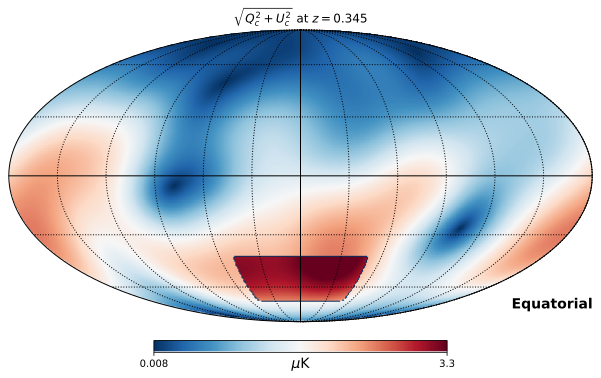

In [104]:
mask_3g_gal_trans = mask_3g_gal_binary.copy()
mask_3g_gal_trans[mask_3g_gal<0.3] = 0.7
hp.mollview(Pc_z0p345*1e6*mask_3g_gal_trans, cmap='RdBu_r',coord=['G','C'], min=0.008, max=3.3, title=r'$\sqrt{Q_c^2+U_c^2}$ at $z=0.345$', unit=r'$\mu$K')
hp.graticule()
plt.savefig('plots/pc_z0p345.pdf')

In [99]:
Pc_z0p8 = theory.remote_quadrupole(0.8,)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


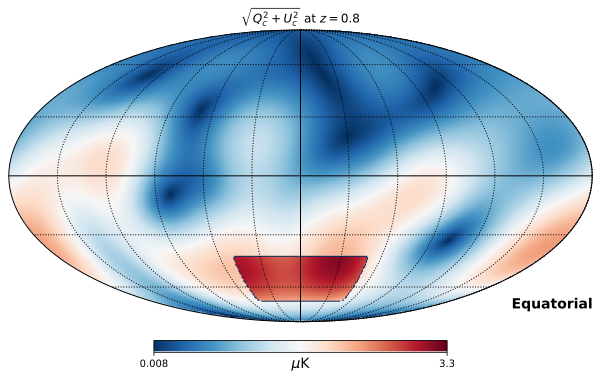

In [105]:
hp.mollview(Pc_z0p8*1e6*mask_3g_gal_trans, cmap='RdBu_r',coord=['G','C'], min=0.008, max=3.3, title=r'$\sqrt{Q_c^2+U_c^2}$ at $z=0.8$', unit=r'$\mu$K')
hp.graticule()
plt.savefig('plots/pc_z0p8.pdf')

In [56]:
vec = np.asarray([[np.random.rand()-1j*np.random.rand(),np.random.rand()+1j*np.random.rand()] for i in range(10)])

In [67]:
vec.conjugate().T[:,9]

array([0.96609842+0.80915029j, 0.80640963-0.93135591j])

array([[0.99373185-0.80371434j, 0.68233824+0.42272278j],
       [0.97105187-0.01303031j, 0.02075855+0.00730969j],
       [0.65526649-0.03786797j, 0.42360945+0.8365779j ],
       [0.14266781-0.58397804j, 0.73364501+0.92512387j],
       [0.23519126-0.32733162j, 0.5747209 +0.10407142j],
       [0.84956341-0.16817106j, 0.65819903+0.0179736j ],
       [0.95558214-0.53749866j, 0.1107911 +0.63705409j],
       [0.71643252-0.20536906j, 0.88056449+0.54595844j],
       [0.20515172-0.21943624j, 0.85651516+0.04634988j],
       [0.96609842-0.80915029j, 0.80640963+0.93135591j]])

In [110]:
cov  = np.diag(np.random.randn(10))
cov2 = np.diag(np.random.randn(10*2))

In [74]:
np.dot(vec, np.dot(np.linalg.inv(cov),vec.conjugate().T))

ValueError: shapes (10,10) and (2,10) not aligned: 10 (dim 1) != 2 (dim 0)

In [77]:
np.median(mask_3g_gal

2.413582909921441e-10

In [107]:
vec2 = vec.flatten()

In [112]:
np.dot(vec2, np.dot(np.linalg.inv(cov2),vec2.conjugate().T)).real

10.815762120604697

In [113]:
theory.alms_smica

array([-3.86755926e-12+0.00000000e+00j, -1.01659146e-10+0.00000000e+00j,
        1.07018236e-05+0.00000000e+00j, ...,
        3.13258354e-08-2.66873942e-08j,  2.53089142e-08-2.79997808e-08j,
       -2.73258623e-08+3.35515880e-09j])

In [125]:
vec[0]*vec[1].conj(), vec[0].conj()*vec[1]

(array([0.97543782-0.76749967j, 0.01725432+0.00378744j]),
 array([0.97543782+0.76749967j, 0.01725432-0.00378744j]))

In [124]:
].conj()

array([0.97543782-0.76749967j, 0.01725432+0.00378744j])

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


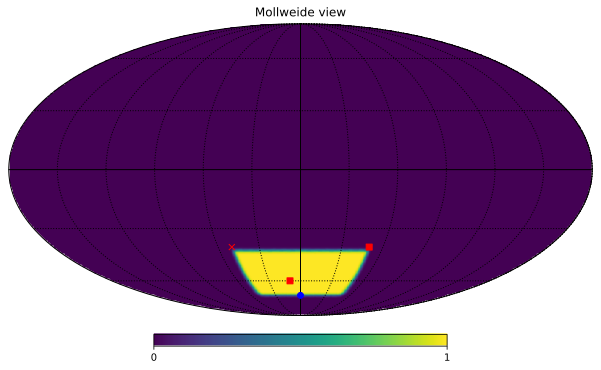

In [160]:
hp.mollview(mask_3g)
hp.graticule()
hp.projplot(np.pi/2-np.deg2rad(-70), 0, 'bo')
hp.projplot(np.pi/2-np.deg2rad(-40), np.deg2rad(50), 'rx')
hp.projplot(np.pi/2-np.deg2rad(-40), np.deg2rad(-50), 'rs')
hp.projplot(np.pi/2-np.deg2rad(-60), np.deg2rad(10), 'rs')